In [1]:
from cascade.model import CascadeNet
import torch
import numpy as np
from torch.utils import data
from utils import *
from mri_utils_test import *
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
G = CascadeNet().cuda() # input channels:  Z(X) x Y -> output channel X
G.eval()
idx=1999
G.load_state_dict(torch.load('./parameters/checkpoint%d/G.pt'%(idx)))

In [55]:
ssmis = []
psnrs=[]
variances = []
sse = []
mri_test = MRIDataSet('../data/CORRECTED_COMBINED_bilkent_20_validation.mat')#, external_mask='../data/designed_mask.pt')
dataloader_test = DataLoader(mri_test, batch_size=1)

In [56]:
def psnr(img, r_img):
    return 10*torch.log10(torch.max(r_img)**2/torch.mean((img-r_img)**2))

In [57]:
for i, (x, y, mask) in enumerate(dataloader_test):
    outps = []
    for j in range(2):
        zv = torch.rand((1, 2, 256, 256)).cuda()
        observedv = y.reshape((1,2,256,256)).cuda()
        inpv = torch.cat((observedv, zv), 1)
        outps.append(G(inpv, mask.cuda()).cpu().detach().numpy())

    outps = np.concatenate(outps)
    mean = np.mean(outps,0, keepdims=True)
    sse.append(np.mean((mean - x.numpy())**2))
    mean = np.sqrt(mean[0,0]**2+mean[0,1]**2)
    variances.append(np.sum(np.var(outps, 0)))
    x = torch.sqrt(x[0,0]**2+x[0,1]**2)
    psnrs.append(psnr(torch.from_numpy(mean),x).cpu().numpy())
#     ssmis.append(ssim(x.numpy(), mean, data_range=mean.max()-mean.min()))
    print('epoch %d %d/%d'%(idx ,i, len(dataloader_test)),end=' ')
    print('var: %.4f'%(variances[-1]), end=' ')
    print('mse: %.4f'%(sse[-1]))
#     print('SSIM: %.4f'%(np.mean(ssmis)))

epoch 1999 0/1000 var: 14.2390 mse: 0.0007
epoch 1999 1/1000 var: 24.5290 mse: 0.0008
epoch 1999 2/1000 var: 16.5513 mse: 0.0009
epoch 1999 3/1000 var: 23.0833 mse: 0.0010
epoch 1999 4/1000 var: 12.6250 mse: 0.0005
epoch 1999 5/1000 var: 3.8094 mse: 0.0002
epoch 1999 6/1000 var: 16.0727 mse: 0.0008
epoch 1999 7/1000 var: 5.5988 mse: 0.0003
epoch 1999 8/1000 var: 6.0894 mse: 0.0003
epoch 1999 9/1000 var: 2.3406 mse: 0.0001
epoch 1999 10/1000 var: 2.5223 mse: 0.0001
epoch 1999 11/1000 var: 4.0501 mse: 0.0002
epoch 1999 12/1000 var: 8.5027 mse: 0.0004
epoch 1999 13/1000 var: 3.8986 mse: 0.0001
epoch 1999 14/1000 var: 8.5880 mse: 0.0003
epoch 1999 15/1000 var: 7.3275 mse: 0.0003
epoch 1999 16/1000 var: 5.7649 mse: 0.0002
epoch 1999 17/1000 var: 6.8222 mse: 0.0002
epoch 1999 18/1000 var: 9.1907 mse: 0.0003
epoch 1999 19/1000 var: 3.5700 mse: 0.0001
epoch 1999 20/1000 var: 6.5179 mse: 0.0003
epoch 1999 21/1000 var: 3.0631 mse: 0.0001
epoch 1999 22/1000 var: 6.7021 mse: 0.0003
epoch 1999 23/1

epoch 1999 188/1000 var: 6.9555 mse: 0.0002
epoch 1999 189/1000 var: 11.4719 mse: 0.0005
epoch 1999 190/1000 var: 3.6406 mse: 0.0002
epoch 1999 191/1000 var: 4.4069 mse: 0.0002
epoch 1999 192/1000 var: 2.6216 mse: 0.0001
epoch 1999 193/1000 var: 8.1840 mse: 0.0005
epoch 1999 194/1000 var: 4.2640 mse: 0.0002
epoch 1999 195/1000 var: 3.7413 mse: 0.0001
epoch 1999 196/1000 var: 8.9980 mse: 0.0004
epoch 1999 197/1000 var: 11.8013 mse: 0.0005
epoch 1999 198/1000 var: 6.1852 mse: 0.0002
epoch 1999 199/1000 var: 4.2088 mse: 0.0002
epoch 1999 200/1000 var: 10.8713 mse: 0.0006
epoch 1999 201/1000 var: 20.6790 mse: 0.0009
epoch 1999 202/1000 var: 7.7738 mse: 0.0004
epoch 1999 203/1000 var: 6.5166 mse: 0.0003
epoch 1999 204/1000 var: 15.1835 mse: 0.0008
epoch 1999 205/1000 var: 16.4017 mse: 0.0008
epoch 1999 206/1000 var: 15.9829 mse: 0.0011
epoch 1999 207/1000 var: 22.6155 mse: 0.0016
epoch 1999 208/1000 var: 4.2676 mse: 0.0002
epoch 1999 209/1000 var: 6.8876 mse: 0.0007
epoch 1999 210/1000 var:

epoch 1999 374/1000 var: 6.5939 mse: 0.0003
epoch 1999 375/1000 var: 5.3053 mse: 0.0002
epoch 1999 376/1000 var: 4.8164 mse: 0.0002
epoch 1999 377/1000 var: 9.1882 mse: 0.0003
epoch 1999 378/1000 var: 6.9762 mse: 0.0003
epoch 1999 379/1000 var: 4.2930 mse: 0.0002
epoch 1999 380/1000 var: 26.7803 mse: 0.0013
epoch 1999 381/1000 var: 4.9032 mse: 0.0002
epoch 1999 382/1000 var: 14.3104 mse: 0.0009
epoch 1999 383/1000 var: 23.4161 mse: 0.0012
epoch 1999 384/1000 var: 5.1691 mse: 0.0002
epoch 1999 385/1000 var: 13.4659 mse: 0.0005
epoch 1999 386/1000 var: 5.0820 mse: 0.0002
epoch 1999 387/1000 var: 14.0091 mse: 0.0006
epoch 1999 388/1000 var: 3.5838 mse: 0.0002
epoch 1999 389/1000 var: 4.2006 mse: 0.0002
epoch 1999 390/1000 var: 13.2321 mse: 0.0006
epoch 1999 391/1000 var: 7.0619 mse: 0.0003
epoch 1999 392/1000 var: 4.6850 mse: 0.0002
epoch 1999 393/1000 var: 7.1278 mse: 0.0004
epoch 1999 394/1000 var: 3.5371 mse: 0.0001
epoch 1999 395/1000 var: 6.8082 mse: 0.0002
epoch 1999 396/1000 var: 1

epoch 1999 560/1000 var: 6.5469 mse: 0.0003
epoch 1999 561/1000 var: 4.0776 mse: 0.0002
epoch 1999 562/1000 var: 13.7832 mse: 0.0006
epoch 1999 563/1000 var: 10.1423 mse: 0.0004
epoch 1999 564/1000 var: 12.9349 mse: 0.0005
epoch 1999 565/1000 var: 7.7093 mse: 0.0004
epoch 1999 566/1000 var: 2.8242 mse: 0.0001
epoch 1999 567/1000 var: 5.8983 mse: 0.0002
epoch 1999 568/1000 var: 6.5318 mse: 0.0003
epoch 1999 569/1000 var: 5.9196 mse: 0.0002
epoch 1999 570/1000 var: 2.3452 mse: 0.0001
epoch 1999 571/1000 var: 7.6470 mse: 0.0003
epoch 1999 572/1000 var: 8.9723 mse: 0.0006
epoch 1999 573/1000 var: 4.7626 mse: 0.0002
epoch 1999 574/1000 var: 7.5547 mse: 0.0003
epoch 1999 575/1000 var: 8.3528 mse: 0.0003
epoch 1999 576/1000 var: 14.9285 mse: 0.0004
epoch 1999 577/1000 var: 11.4172 mse: 0.0003
epoch 1999 578/1000 var: 3.8650 mse: 0.0001
epoch 1999 579/1000 var: 5.0288 mse: 0.0002
epoch 1999 580/1000 var: 6.6471 mse: 0.0003
epoch 1999 581/1000 var: 9.9726 mse: 0.0004
epoch 1999 582/1000 var: 22

epoch 1999 746/1000 var: 6.4664 mse: 0.0002
epoch 1999 747/1000 var: 6.2419 mse: 0.0002
epoch 1999 748/1000 var: 2.6680 mse: 0.0001
epoch 1999 749/1000 var: 8.3867 mse: 0.0004
epoch 1999 750/1000 var: 4.9804 mse: 0.0002
epoch 1999 751/1000 var: 4.8300 mse: 0.0002
epoch 1999 752/1000 var: 2.6894 mse: 0.0001
epoch 1999 753/1000 var: 4.1193 mse: 0.0002
epoch 1999 754/1000 var: 4.1982 mse: 0.0002
epoch 1999 755/1000 var: 11.1418 mse: 0.0005
epoch 1999 756/1000 var: 12.6442 mse: 0.0007
epoch 1999 757/1000 var: 3.9100 mse: 0.0001
epoch 1999 758/1000 var: 2.7903 mse: 0.0001
epoch 1999 759/1000 var: 9.5689 mse: 0.0004
epoch 1999 760/1000 var: 5.7927 mse: 0.0003
epoch 1999 761/1000 var: 17.1435 mse: 0.0010
epoch 1999 762/1000 var: 23.5477 mse: 0.0014
epoch 1999 763/1000 var: 17.7432 mse: 0.0009
epoch 1999 764/1000 var: 21.2788 mse: 0.0009
epoch 1999 765/1000 var: 15.6613 mse: 0.0010
epoch 1999 766/1000 var: 3.5669 mse: 0.0002
epoch 1999 767/1000 var: 5.4543 mse: 0.0002
epoch 1999 768/1000 var: 

epoch 1999 932/1000 var: 9.4465 mse: 0.0006
epoch 1999 933/1000 var: 4.2794 mse: 0.0002
epoch 1999 934/1000 var: 5.5823 mse: 0.0002
epoch 1999 935/1000 var: 4.7542 mse: 0.0002
epoch 1999 936/1000 var: 6.6879 mse: 0.0002
epoch 1999 937/1000 var: 11.8937 mse: 0.0003
epoch 1999 938/1000 var: 4.7306 mse: 0.0001
epoch 1999 939/1000 var: 10.6174 mse: 0.0004
epoch 1999 940/1000 var: 6.2856 mse: 0.0003
epoch 1999 941/1000 var: 15.4894 mse: 0.0009
epoch 1999 942/1000 var: 25.9412 mse: 0.0016
epoch 1999 943/1000 var: 11.5468 mse: 0.0005
epoch 1999 944/1000 var: 18.4204 mse: 0.0014
epoch 1999 945/1000 var: 5.1058 mse: 0.0002
epoch 1999 946/1000 var: 17.2243 mse: 0.0013
epoch 1999 947/1000 var: 7.3393 mse: 0.0003
epoch 1999 948/1000 var: 4.2430 mse: 0.0002
epoch 1999 949/1000 var: 7.9791 mse: 0.0004
epoch 1999 950/1000 var: 8.0280 mse: 0.0004
epoch 1999 951/1000 var: 3.1541 mse: 0.0002
epoch 1999 952/1000 var: 6.6475 mse: 0.0003
epoch 1999 953/1000 var: 7.3561 mse: 0.0003
epoch 1999 954/1000 var: 

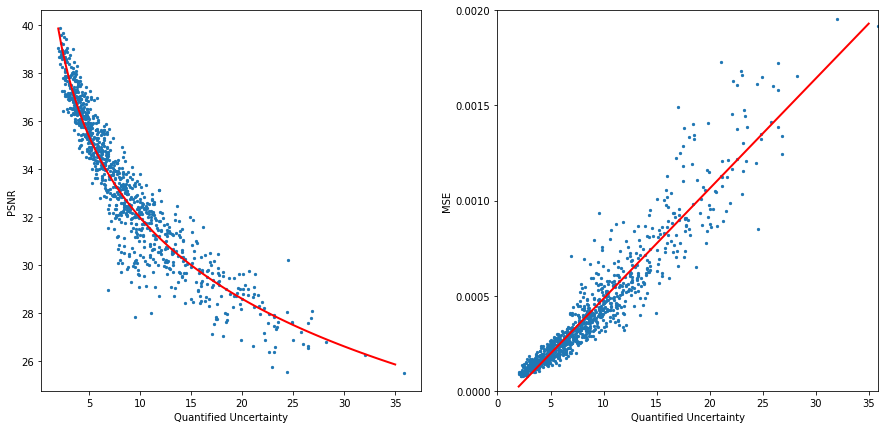

In [64]:
plt.figure(figsize=(15,7))
variances_ = np.array(variances)
sse = np.array(sse)
plt.subplot(121)
plt.xlabel('Quantified Uncertainty')
plt.ylabel('PSNR')
plt.scatter(variances_, psnrs, s=5)
x = np.linspace(2,35,100)
y = -11.28*np.log10(x) + 43.27 # r = -0.90
plt.plot(x,y,color='r', linewidth=2)

plt.subplot(122)
plt.xlabel('Quantified Uncertainty')
plt.ylabel('MSE')
plt.scatter(variances_, sse, s=5)
plt.axis([0, np.max(variances), 0, 0.002])
plt.yticks(np.arange(0,0.0025,0.0005))
y = 5.78e-5 * x -9.315e-5 # r = 0.95
plt.plot(x,y,color='r', linewidth=2)
plt.savefig('./psnr_vs_uncer2.pdf')

In [59]:
slope, intercept, r_value, p_value, std_err = linregress(np.array(variances),np.array(sse))

In [60]:
slope, intercept, r_value

(5.750626128149802e-05, -8.822573053970776e-05, 0.9460222668312565)

In [61]:
slope, intercept, r_value, p_value, std_err = linregress(np.log10(np.array(variances)),np.array(psnrs))

In [62]:
slope, intercept, r_value

(-11.417820173910817, 43.37109077195424, -0.9505700857387713)

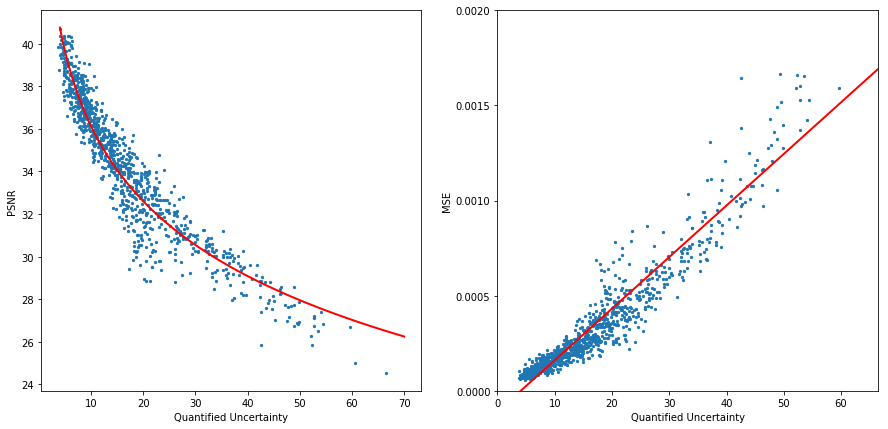

In [53]:
plt.figure(figsize=(15,7))
variances_ = np.array(variances)
sse = np.array(sse)
plt.subplot(121)
plt.xlabel('Quantified Uncertainty')
plt.ylabel('PSNR')
plt.scatter(variances_, psnrs, s=5)
x = np.linspace(4,70,100)
y = -11.67*np.log10(x) + 47.78 # r = -0.95
plt.plot(x,y,color='r', linewidth=2)

plt.subplot(122)
plt.xlabel('Quantified Uncertainty')
plt.ylabel('MSE')
plt.scatter(variances_, sse, s=5)
plt.axis([0, np.max(variances), 0, 0.002])
plt.yticks(np.arange(0,0.0025,0.0005))
y = 2.71e-5 * x -0.00011 # r = 0.94
plt.plot(x,y,color='r', linewidth=2)
plt.savefig('.psnr_vs_uncer100.pdf')

In [43]:
slope, intercept, r_value, p_value, std_err = linregress(np.array(variances),np.array(sse))

In [44]:
slope, intercept, r_value

(2.7109432797047584e-05, -0.00011295723414116621, 0.9460182734451837)

In [47]:
slope, intercept, r_value, p_value, std_err = linregress(np.log10(np.array(variances)),np.array(psnrs))

In [48]:
slope, intercept, r_value

(-11.678355092019046, 47.78805981012833, -0.9477456976261508)